In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# Importing the Libraries¶
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score


In [3]:
#insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')

os.chdir("../soheil")


insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


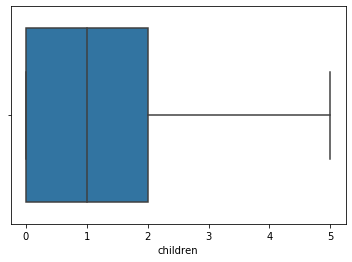

In [8]:
sns.boxplot(data=insurance, x='children')
plt.show()

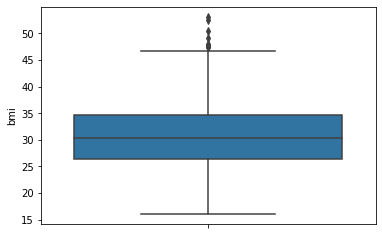

In [9]:
sns.boxplot(data=insurance, y='bmi')
plt.show()

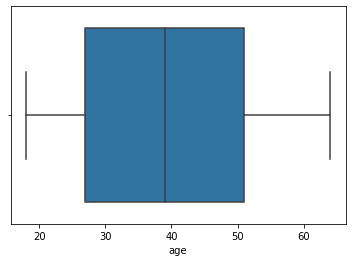

In [10]:
sns.boxplot(data=insurance, x='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C20424E278>,
      dtype=object)

<Figure size 2160x2160 with 0 Axes>

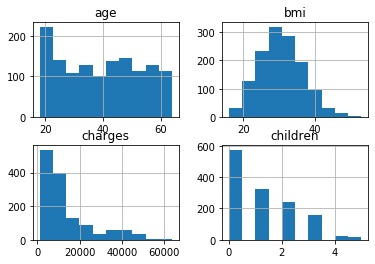

In [11]:
plt.figure(figsize = (30,30))
insurance.hist()

In [12]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


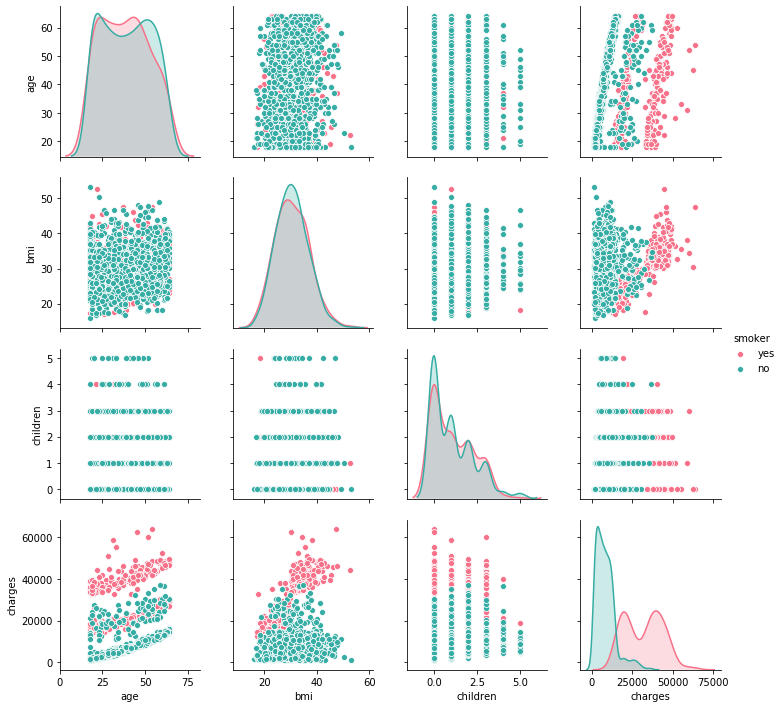

In [13]:
sns.pairplot(insurance, hue='smoker', palette="husl")
plt.show()

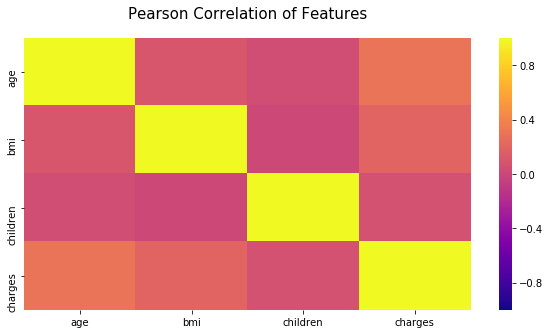

In [14]:
#Correlation Matrix
fig = plt.figure(figsize=[10,5])
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(insurance.corr(), cmap='plasma',vmin=-1, vmax=1 )
plt.show()

In [15]:
insurance['children'] = np.log1p(insurance['children'])

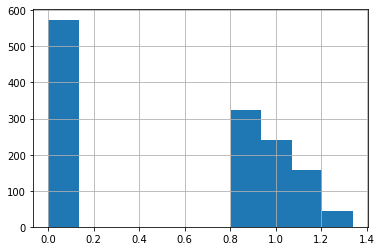

In [16]:
(np.sqrt(insurance['children'])).hist()

In [17]:
print((insurance['age']).skew())

0.05567251565299186


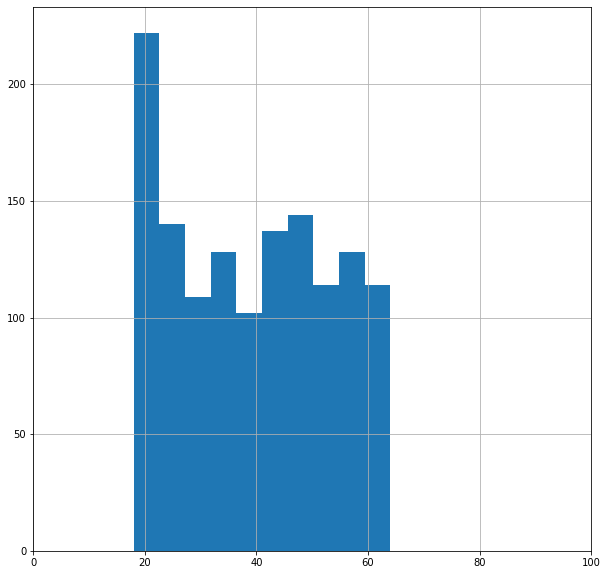

In [18]:
plt.figure(figsize = (10,10))
plt.xlim(0,100)
insurance.age.hist()
plt.show()

In [19]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null float64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.2+ KB


In [20]:
ins = pd.get_dummies(data = insurance, drop_first = True )

In [21]:
ins.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0.000000,16884.92400,0,1,0,0,1
1,18,33.770,0.693147,1725.55230,1,0,0,1,0
2,28,33.000,1.386294,4449.46200,1,0,0,1,0
3,33,22.705,0.000000,21984.47061,1,0,1,0,0
4,32,28.880,0.000000,3866.85520,1,0,1,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(ins.drop(columns = ['charges']))

In [23]:
y=ins['charges']

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
selector = SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, n_estimators=200)).fit(X_new, y)
X_new = selector.transform(X_new)

In [25]:
X_new = pd.DataFrame(data= X_new)

In [26]:
from sklearn.model_selection import GridSearchCV


In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth =3, random_state=0)
scores = cross_val_score(regressor, X_new, y, cv=5)
scores

array([0.8782583 , 0.78176659, 0.88089714, 0.82756408, 0.85377766])

In [28]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)


scores = cross_val_score(neigh, X_new, y, cv=5)
scores

array([0.88149772, 0.78792981, 0.86893762, 0.82130766, 0.8446153 ])

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

scores = cross_val_score(reg, X_new, y, cv=5)
scores

array([0.76172245, 0.70978635, 0.77205988, 0.72830177, 0.75328122])

In [30]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=.1)

scores = cross_val_score(clf, X_new, y, cv=5)
scores


array([0.76172371, 0.70979568, 0.77204929, 0.72830766, 0.75327788])

In [31]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( n_estimators=200, max_depth=2, random_state=0)

scores = cross_val_score(regr, X_new, y, cv=5)
scores

array([0.85183238, 0.77526516, 0.85704306, 0.81878117, 0.83151184])

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
clfg = GradientBoostingRegressor(n_estimators=200, max_depth=2,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
scores = cross_val_score(clfg, X_new, y, cv=5)
scores

array([0.88035398, 0.79993044, 0.88483938, 0.84347372, 0.85560934])

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

In [33]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(learning_rate=0.5, random_state=0, n_estimators=200)
scores = cross_val_score(ada, X_new, y, cv=5)
scores

array([0.8405355 , 0.76596061, 0.83685099, 0.79613934, 0.82440357])